# Multi-panel figure showing relative timing of winter velocity peak 2018-2023

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray
import pyproj

## Load velocity data

In [5]:
ds = xarray.load_dataset("../Hubbard_5eminus5.nc")
ds["v"] = np.sqrt(ds.vx**2 + ds.vy**2).fillna(0)
ds["month"] = ds.time.dt.month
ds["year"] = ds.time.dt.year
ds["doy"] = ds.time.dt.dayofyear

## Fiddling around

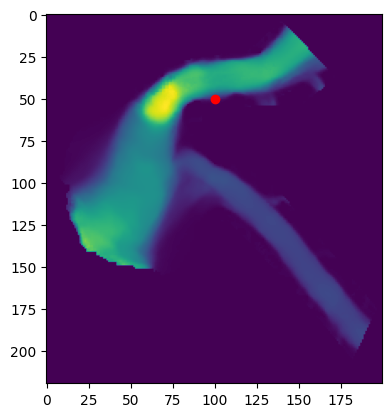

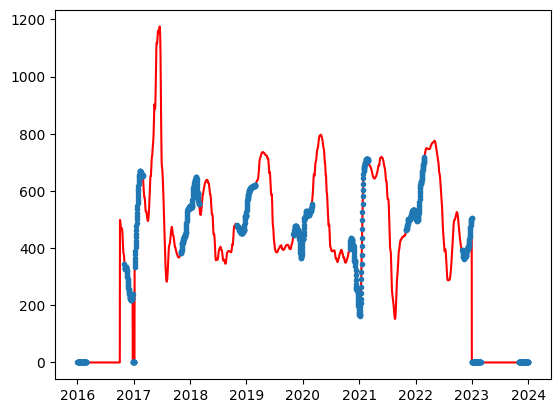

In [51]:
#x, y = (30, 120)
#x, y = (100, 40)
x, y = (100, 50)
#x, y = (150, 150)

plt.imshow(np.mean(ds.v, axis=0))
plt.plot([x], [y], "ro")

plt.figure()
plt.plot(ds.time, ds.v[:,y,x], 'r-')

mask = np.logical_or(
   ds.month >= 11,
   ds.month <= 2,
)

# mask = np.logical_and(
#     ds.month >= 2 ,
#     ds.month <= 4,
# )

# mask = np.logical_and(
#     ds.month >= 4 ,
#     ds.month <= 6,
# )

plt.plot(ds.time[mask], ds.v[:,y,x][mask], '.')

## Detect winter peak in each pixel in each year

To-do
Mask out no-winter-peak pixels, try tightening color scale

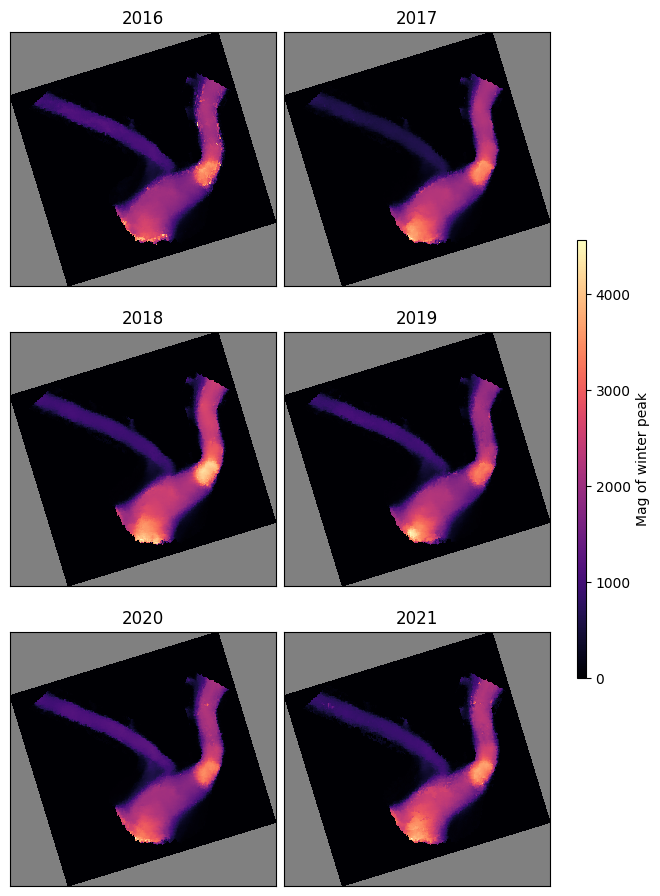

In [7]:
fig, axs = plt.subplots(3, 2, figsize=(6.5, 9), layout="constrained")
axs = axs.flatten()
xform = pyproj.Transformer.from_crs(3413, 3338)
xx, yy = np.meshgrid(ds.x, ds.y)
px, py = xform.transform(xx, yy)

for i, year in enumerate([2016, 2017, 2018, 2019, 2020, 2021]):
    winter_mask = np.logical_or(
        np.logical_and(ds.month >= 11, ds.year == year),
        np.logical_and(ds.month <= 2, ds.year == year+1)
    )
    winter_velocities = ds.v[winter_mask, :, :]
    winter_peak = winter_velocities.max(dim='time')

    im = axs[i].pcolor(px, py, winter_peak, cmap="magma")
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    axs[i].set_title(year)
    axs[i].set_facecolor("grey")
    axs[i].set_aspect(1)

fig.colorbar(im, ax=axs, aspect=50, shrink=.5, label="Mag of winter peak")

fig.savefig("winter_peak_mag.png", bbox_inches="tight", dpi=300)

# Summer Peak 

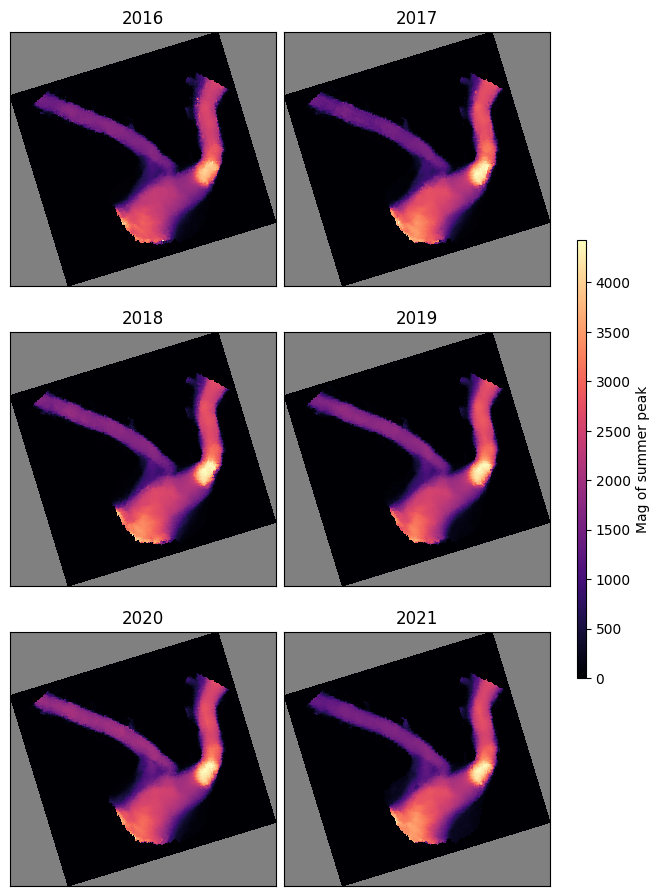

In [8]:
fig, axs = plt.subplots(3, 2, figsize=(6.5, 9), layout="constrained")
axs = axs.flatten()
xform = pyproj.Transformer.from_crs(3413, 3338)
xx, yy = np.meshgrid(ds.x, ds.y)
px, py = xform.transform(xx, yy)

for i, year in enumerate([2016, 2017, 2018, 2019, 2020, 2021]):
    summer_mask = np.logical_and(
        np.logical_and(ds.month >= 4, ds.month <= 6),
        ds.year == year+1,
    )
    summer_velocities = ds.v[summer_mask, :, :]
    summer_peak = summer_velocities.max(dim='time')

    im = axs[i].pcolor(px, py, summer_peak, cmap="magma")
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    axs[i].set_title(year)
    axs[i].set_facecolor("grey")
    axs[i].set_aspect(1)

fig.colorbar(im, ax=axs, aspect=50, shrink=.5, label="Mag of summer peak")
#fig.savefig("summer_peak_mag.png", bbox_inches="tight", dpi=300)

# Minimum between peaks 

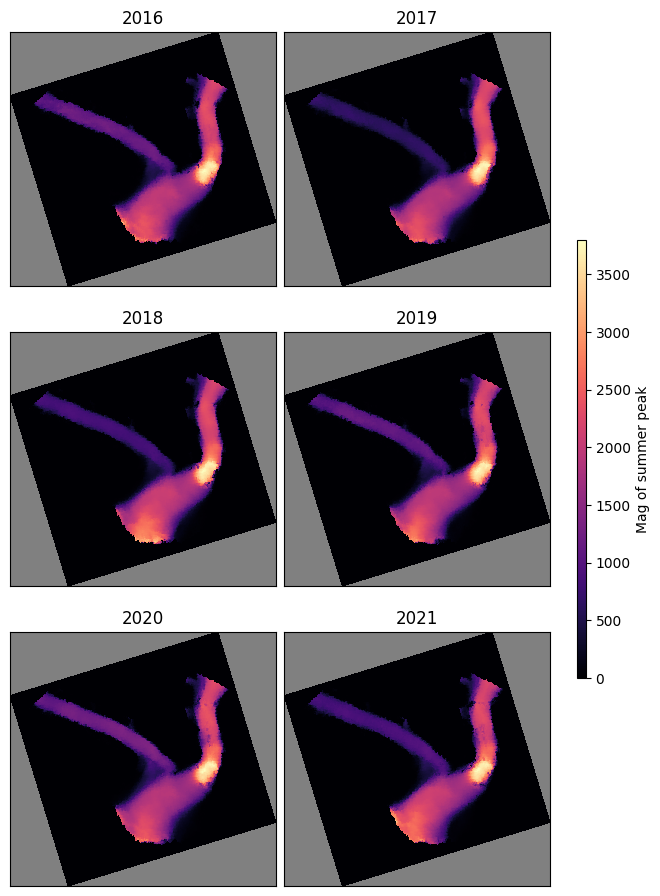

In [9]:
fig, axs = plt.subplots(3, 2, figsize=(6.5, 9), layout="constrained")
axs = axs.flatten()
xform = pyproj.Transformer.from_crs(3413, 3338)
xx, yy = np.meshgrid(ds.x, ds.y)
px, py = xform.transform(xx, yy)

for i, year in enumerate([2016, 2017, 2018, 2019, 2020, 2021]):
    middle_mask = np.logical_and(
        np.logical_and(ds.month >= 2.5, ds.month <= 4),
        ds.year == year+1,
    )
    middle_velocities = ds.v[middle_mask, :, :]
    min = middle_velocities.min(dim='time')

    im = axs[i].pcolor(px, py, min, cmap="magma")
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    axs[i].set_title(year)
    axs[i].set_facecolor("grey")
    axs[i].set_aspect(1)

fig.colorbar(im, ax=axs, aspect=50, shrink=.5, label="Mag of summer peak")
#fig.savefig("summer_peak_mag.png", bbox_inches="tight", dpi=300)

# Strength of double peak

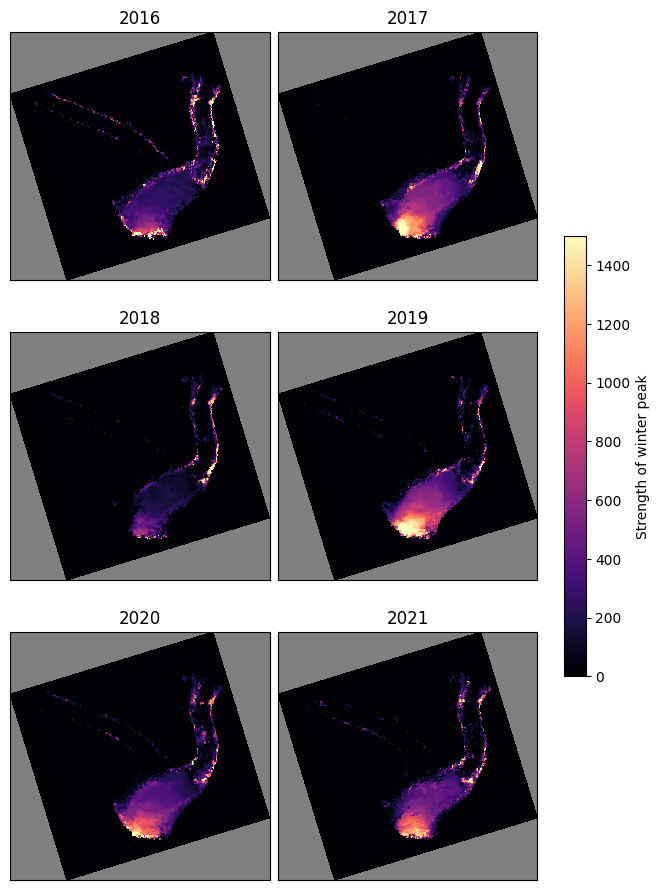

In [66]:

import matplotlib.colors as mcolors

fig, axs = plt.subplots(3, 2, figsize=(6.5, 9), layout="constrained")
axs = axs.flatten()
xform = pyproj.Transformer.from_crs(3413, 3338)
xx, yy = np.meshgrid(ds.x, ds.y)
px, py = xform.transform(xx, yy)

for i, year in enumerate([2016, 2017, 2018, 2019, 2020, 2021]):
    winter_mask = np.logical_or(
        np.logical_and(ds.month >= 11, ds.year == year),
        np.logical_and(ds.month <= 2, ds.year == year+1)
    )
    
    winter_velocities = ds.v[winter_mask, :, :]
    winter_peak = winter_velocities.max(dim='time')

    middle_mask = np.logical_and(
        np.logical_and(ds.month >= 2.05, ds.month <= 4),
        ds.year == year+1,
    )
    middle_velocities = ds.v[middle_mask, :, :]
    min = middle_velocities.min(dim='time')

    summer_mask = np.logical_and(
        np.logical_and(ds.month >= 4, ds.month <= 6),
        ds.year == year+1,
    )
    summer_velocities = ds.v[summer_mask, :, :]
    summer_peak = summer_velocities.max(dim='time')

    ###### calculate strength of double peaks 

    avg_mag = (winter_peak + summer_peak)/2
    
    mask = (winter_peak < min) | (summer_peak < 500)
    
    #strength = ((winter_peak - min)/(winter_peak)) *((summer_peak - min)/(summer_peak))
    #strength = ((winter_peak - min)/np.average(ds.v)) *((summer_peak - min)/np.average(min))
   # strength = (avg_mag - min) * (summer_peak/winter_peak) # (winter_peak/summer_peak)
    strength = (winter_peak - min) #/(summer_peak-min) # (winter_peak/summer_peak)
    strength = np.where(mask, 0, strength)

    ####  calculate strength of simgle peaks 
    
    mask1 = (winter_peak < min) | (summer_peak < 500)
    mask2 = (summer_peak < 500) 
    
    strength1 = (winter_peak - min)/winter_peak
    strength2 = (summer_peak - min)/summer_peak

    strength1 = np.where(mask1, 0, strength1)
    strength2 = np.where(mask2, 0, strength2)
    #### 
    
    im = axs[i].pcolor(px, py, strength, cmap="magma", vmin=0, vmax=1500)
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    axs[i].set_title(year)
    axs[i].set_facecolor("grey")
    axs[i].set_aspect(1)

    
fig.colorbar(im, ax=axs, shrink=.5, label="Strength of winter peak")
fig.savefig("double_strength.png", bbox_inches="tight", dpi=300)

# RB plot of Winter and summer peak

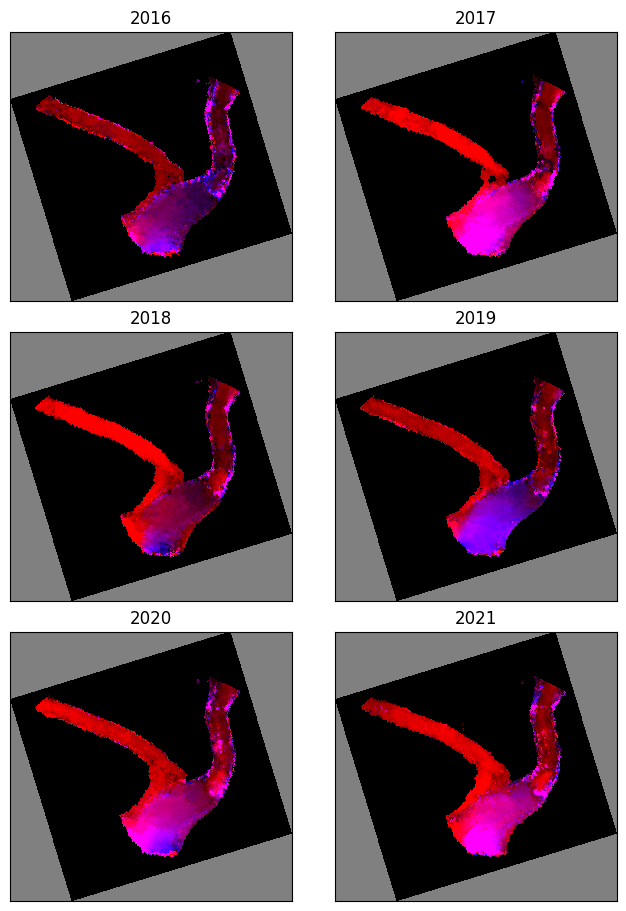

In [56]:

import matplotlib.colors as mcolors

fig, axs = plt.subplots(3, 2, figsize=(6.5, 9), layout="constrained")
axs = axs.flatten()
xform = pyproj.Transformer.from_crs(3413, 3338)
xx, yy = np.meshgrid(ds.x, ds.y)
px, py = xform.transform(xx, yy)

for i, year in enumerate([2016, 2017, 2018, 2019, 2020, 2021]):
    winter_mask = np.logical_or(
        np.logical_and(ds.month >= 11, ds.year == year),
        np.logical_and(ds.month <= 2, ds.year == year+1)
    )
    
    winter_velocities = ds.v[winter_mask, :, :]
    winter_peak = winter_velocities.max(dim='time')

    middle_mask = np.logical_and(
        np.logical_and(ds.month >= 2.05, ds.month <= 4),
        ds.year == year+1,
    )
    middle_velocities = ds.v[middle_mask, :, :]
    min = middle_velocities.min(dim='time')

    summer_mask = np.logical_and(
        np.logical_and(ds.month >= 4, ds.month <= 6),
        ds.year == year+1,
    )
    summer_velocities = ds.v[summer_mask, :, :]
    summer_peak = summer_velocities.max(dim='time')

    mask = (winter_peak < min) | (summer_peak < 800)
    mask2 = (summer_peak < 800)
    
    strength1 = (winter_peak - min)/750
    strength2 = (summer_peak - min)/750
    strength1.values[strength1.values >1] = 1
    strength2.values[strength2.values >1] = 1
    strength1 = np.where(mask, 0, strength1)
    strength2 = np.where(mask2, 0, strength2)

    im = axs[i].pcolormesh(px, py, np.dstack((strength2, np.zeros_like(strength1), strength1)))
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    axs[i].set_title(year)
    axs[i].set_facecolor("grey")
    axs[i].set_aspect(1)
    
fig.savefig("RBplot_summer_winter_strength.png", bbox_inches="tight", dpi=300)

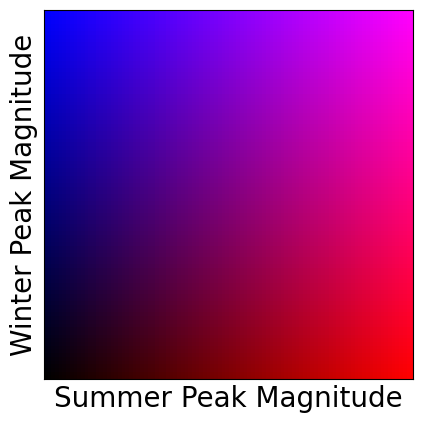

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define the size of the box
box_size = 100

# Create a gradient from black to red
colors_red = [(0, 0, 0), (1, 0, 0)]  # Black to red
cmap_red = LinearSegmentedColormap.from_list('RedGradient', colors_red)

# Create a gradient from black to blue
colors_blue = [(0, 0, 0), (0, 0, 1)]  # Black to blue
cmap_blue = LinearSegmentedColormap.from_list('BlueGradient', colors_blue)

# Create the box
box = np.zeros((box_size, box_size, 3))  # Initialize box with zeros

# Apply the red gradient along the rows and the blue gradient along the columns of the box
for i in range(box_size):
    box[i, :, 0] = cmap_red(np.linspace(0, 1, box_size))[:, 0]  # Red gradient along the rows
    box[:, i, 2] = cmap_blue(np.linspace(0, 1, box_size))[:, 2]  # Blue gradient along the columns

# Plot the box
plt.imshow(box, interpolation='nearest', extent=(0, 1, 0, 1))
plt.gca().invert_yaxis()
plt.xticks([])
plt.yticks([])
plt.xlabel("Summer Peak Magnitude") 
plt.ylabel("Winter Peak Magnitude") 
text_objs = plt.gcf().findobj(plt.Text)
for text_obj in text_objs:
    text_obj.set_fontsize(20)
plt.savefig("color_box.png")
plt.show()